<a href="https://colab.research.google.com/github/GauravPatel89/EPAi2-Assignments/blob/main/Session7/7A/EPAi2_Assignment_7A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


  - Use Faker library to get 10000 random profiles. Using namedtuple, calculate the largest blood type, mean-current_location, oldest_person_age and average age (add proper doc-strings). - 250
  - Do the same thing above using a dictionary. Prove that namedtuple is faster. - 250
  - Create a fake data (you can use Faker for company names) for imaginary stock exchange for top 100 companies (name, symbol, open, high, close). Assign a random weight to all the companies. Calculate (for 50 instances during the day) and show what value stock market started at, what was the highest value during the day and where did it end. Make sure your open, high, close are not totally random. You can only use namedtuple. - 500


In [ ]:
!pip install Faker

     |████████████████████████████████| 1.1MB 8.7MB/s 


In [ ]:
from faker import Faker

## Profiles using namedtuples

In [ ]:
from collections import namedtuple
Person = namedtuple('Person', 'name age blood_group loc_latitude loc_longitude')
Person.__doc__ = 'Representation of Persons containing Fields: name,age,blood_group, loc_latitude, loc_longitude'
Person.name.__doc__ = "Name of the Person"
Person.age.__doc__ = "Age of the person in Years"
Person.blood_group.__doc__ = "Blood group of the Person"
Person.loc_latitude.__doc__= "Latitude of Person's current location"
Person.loc_longitude.__doc__= "Longitude of Person's current location"

In [ ]:
help(Person)

Help on class Person in module __main__:

class Person(builtins.tuple)
 |  Person(name, age, blood_group, loc_latitude, loc_longitude)
 |  
 |  Representation of Persons containing Fields: name,age,blood_group, loc_latitude, loc_longitude
 |  
 |  Method resolution order:
 |      Person
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getnewargs__(self)
 |      Return self as a plain tuple.  Used by copy and pickle.
 |  
 |  __repr__(self)
 |      Return a nicely formatted representation string
 |  
 |  _asdict(self)
 |      Return a new OrderedDict which maps field names to their values.
 |  
 |  _replace(_self, **kwds)
 |      Return a new Person object replacing specified fields with new values
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  _make(iterable) from builtins.type
 |      Make a new Person object from a sequence or iterable
 |  
 |  ---------------------------

In [ ]:
# Generate 10000 random profiles of persons namedtuples
from faker import Faker
from random import randint
 
fake = Faker('hi_IN')
 
person_list_namedtuple = []
for _ in range(10000):
  person = Person(
      name = fake.name(),
      age = randint(1,110),
      blood_group=fake.profile()['blood_group'],
      loc_latitude = fake.latitude(),
      loc_longitude = fake.longitude()
  )
  person_list_namedtuple.append(person)
 
print(person_list_namedtuple[:5])

[Person(name='हुसैन खान', age=47, blood_group='B+', loc_latitude=Decimal('23.6989555'), loc_longitude=Decimal('-127.723154')), Person(name='ईवा दोषी', age=7, blood_group='B-', loc_latitude=Decimal('72.686369'), loc_longitude=Decimal('145.010566')), Person(name='वफादार, विजया', age=71, blood_group='O+', loc_latitude=Decimal('48.032346'), loc_longitude=Decimal('7.284755')), Person(name='अनाया काले', age=41, blood_group='B+', loc_latitude=Decimal('-61.0529625'), loc_longitude=Decimal('-150.385385')), Person(name='शिरोळे, विजय', age=32, blood_group='AB+', loc_latitude=Decimal('-60.6430825'), loc_longitude=Decimal('-158.572872'))]


## Profiles using Dictionary

In [ ]:
# Generate 10000 random profiles of persons namedtuples
from faker import Faker
from random import randint
 
fake = Faker('hi_IN') # Setup for hindi indian names

person_list_dictionary = []
for _ in range(10000):
  person = {
      'name' : fake.name(),
      'age' : randint(1,110),
      'blood_group' : fake.profile()['blood_group'],
      'loc_latitude' : fake.latitude(),
      'loc_longitude' : fake.longitude()
  }
  person_list_dictionary.append(person)
 
print(person_list_dictionary[:5])

[{'name': 'रोहन लाला', 'age': 99, 'blood_group': 'B+', 'loc_latitude': Decimal('-81.402400'), 'loc_longitude': Decimal('-66.799654')}, {'name': 'दारा, निखिल', 'age': 38, 'blood_group': 'A+', 'loc_latitude': Decimal('-15.636785'), 'loc_longitude': Decimal('33.935325')}, {'name': 'ढींगरा, पार्थ', 'age': 62, 'blood_group': 'B+', 'loc_latitude': Decimal('-79.4434325'), 'loc_longitude': Decimal('59.699349')}, {'name': 'साया, मरियम', 'age': 79, 'blood_group': 'B+', 'loc_latitude': Decimal('3.5417725'), 'loc_longitude': Decimal('90.267110')}, {'name': 'दयाल, सरस्वती', 'age': 21, 'blood_group': 'B-', 'loc_latitude': Decimal('4.5579725'), 'loc_longitude': Decimal('10.255283')}]


## Most common Blood group
Find the most common blood group and compare timing for both namedtuple and dictionary


In [ ]:
## list of namedtuples
from timeit import timeit
from collections import Counter

print('Most Common Blood Group: ',Counter([p.blood_group for p in person_list_namedtuple]).most_common(1))
print('Time for 1000 iterations',timeit('Counter([p.blood_group for p in person_list_namedtuple]).most_common(1)',globals=globals(),number=1000),'secs')

Most Common Blood Group:  [('A-', 1280)]
Time for 1000 iterations 1.556765914999687 secs


In [ ]:
## list of dictionaries
from timeit import timeit
print('Most Common Blood Group: ',Counter([p['blood_group'] for p in person_list_dictionary]).most_common(1))
print('Time for 1000 iterations',timeit('Counter([p[\'blood_group\'] for p in person_list_dictionary]).most_common(1)',globals=globals(),number=1000),'secs')

Most Common Blood Group:  [('O+', 1308)]
Time for 1000 iterations 1.241661342000043 secs


Summary: Finding most common bloodgroup  
Time for 10000 iterations (namedtuples): 1.5567 secs  
Time for 10000 iterations (dictionary): 1.2416 secs

## Mean current location
Find the mean current location and compare timing for both namedtuple and dictionary


In [ ]:
## list of namedtuples
from timeit import timeit
def avg(list): 
    return sum(list)/len(list) 
print('Mean Current Location ',list(map(avg,zip(*[(p.loc_latitude,p.loc_longitude) for p in person_list_namedtuple]))))
print('Time for 1000 iterations',timeit('list(map(avg,zip(*[(p.loc_latitude,p.loc_longitude) for p in person_list_namedtuple])))',globals=globals(),number=1000),'secs')

Mean Current Location  [Decimal('0.13796718555'), Decimal('0.9295106505')]
Time for 1000 iterations 4.3608958879999875 secs


In [ ]:
## list of dictionaries
from timeit import timeit
def avg(list): 
    return sum(list)/len(list) 
print('Mean Current Location ',list(map(avg,zip(*[(p['loc_latitude'],p['loc_longitude']) for p in person_list_dictionary]))))
print('Time for 1000 iterations',timeit('list(map(avg,zip(*[(p[\'loc_latitude\'],p[\'loc_longitude\']) for p in person_list_dictionary])))',globals=globals(),number=1000),'secs')

Mean Current Location  [Decimal('0.2396674799'), Decimal('-0.4985927063')]
Time for 1000 iterations 3.618344494000013 secs


Summary: Finding mean current location  
Time for 1000 iterations (namedtuples): 4.3608 secs  
Time for 1000 iterations (dictionary): 3.6183 secs

## Oldest person age
Find the age of oldest person and compare timing for both namedtuple and dictionary


In [ ]:
## list of namedtuples
from timeit import timeit

print('oldest person age ',max([p.age for p in person_list_namedtuple]))
print('Time for 1000 iterations',timeit('max([p.age for p in person_list_namedtuple])',globals=globals(),number=1000),'secs')

oldest person age  110
Time for 1000 iterations 1.0085335189999967 secs


In [ ]:
## list of namedtuples
from timeit import timeit

print('oldest person age ',max([p['age'] for p in person_list_dictionary]))
print('Time for 1000 iterations',timeit('max([p[\'age\'] for p in person_list_dictionary])',globals=globals(),number=1000),'secs')

oldest person age  110
Time for 1000 iterations 0.6514673420000179 secs


Summary: Finding oldest person age 
Time for 1000 iterations (namedtuples): 1.0085 secs  
Time for 1000 iterations (dictionary): 0.6514 secs

## Average Age
Find the average age and compare timing for both namedtuple and dictionary


In [ ]:
## list of namedtuples
from timeit import timeit
def avg(list): 
    return sum(list)/len(list) 
    
print('Mean Current Location ',avg([p.age for p in person_list_namedtuple]))
print('Time for 1000 iterations',timeit('avg([p.age for p in person_list_namedtuple])',globals=globals(),number=1000),'secs')

Mean Current Location  56.0859
Time for 1000 iterations 0.8829155189999938 secs


In [ ]:
## list of dictionaries
from timeit import timeit
def avg(list): 
    return sum(list)/len(list) 
    
print('Mean Current Location ',avg([p['age'] for p in person_list_dictionary]))
print('Time for 1000 iterations',timeit('avg([p[\'age\'] for p in person_list_dictionary])',globals=globals(),number=1000),'secs')

Mean Current Location  55.9585
Time for 1000 iterations 0.5485623059999796 secs


Summary: Finding oldest person age 
Time for 1000 iterations (namedtuples): 0.8829 secs  
Time for 1000 iterations (dictionary): 0.5485 secs

## Part 3
Create a fake data (you can use Faker for company names) for imaginary stock exchange for top 100 companies (name, symbol, open, high, close). Assign a random weight to all the companies. Calculate (for 50 instances during the day) and show what value stock market started at, what was the highest value during the day and where did it end. Make sure your open, high, close are not totally random. 

In [ ]:
from collections import namedtuple
Stock = namedtuple('Stock', 'name symbol open high close weight')
Stock.__doc__ = 'Representation of Stock of a company containing Fields: name,symbol, open, high, close,weight'
Stock.name.__doc__ = "Name of the Company"
Stock.symbol.__doc__ = "Symbol of the Company"
Stock.open.__doc__ = "Opening Stock price"
Stock.high.__doc__ = "Highest price of Stock during day"
Stock.close.__doc__ = "Closing price of Stock"
Stock.weight.__doc__ = "Weight of the stock in stock market"

help(Stock)

Help on class Stock in module __main__:

class Stock(builtins.tuple)
 |  Stock(name, symbol, open, high, close, weight)
 |  
 |  Representation of Stock of a company containing Fields: name,symbol, open, high, close,weight
 |  
 |  Method resolution order:
 |      Stock
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getnewargs__(self)
 |      Return self as a plain tuple.  Used by copy and pickle.
 |  
 |  __repr__(self)
 |      Return a nicely formatted representation string
 |  
 |  _asdict(self)
 |      Return a new OrderedDict which maps field names to their values.
 |  
 |  _replace(_self, **kwds)
 |      Return a new Stock object replacing specified fields with new values
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  _make(iterable) from builtins.type
 |      Make a new Stock object from a sequence or iterable
 |  
 |  ----------------------------------------------

In [ ]:
# Generate 10000 random profiles of persons namedtuples
from faker import Faker
from random import uniform
import random
 
fake = Faker()
 
stock_exchange_list = []
num_companies = 100

company_weight_list = random.sample(range(1,150),num_companies)
total_weight = sum(company_weight_list)
company_weight_list = [w/total_weight for w in company_weight_list]

stock_market_value = 0
for i in range(num_companies):
  random_price = uniform(20.0,200.0) 
  stock = Stock(
      name = fake.company(),
      symbol = fake.unique.first_name(),
      open = random_price,
      high = random_price, # starting high price is same as opening price
      close = random_price, # starting close price is same as opening price
      weight = company_weight_list[i]
  )
  stock_exchange_list.append(stock)
  stock_market_value += random_price*company_weight_list[i]
 
print(stock_exchange_list[:5])
print('Stock market value',stock_market_value)

[Stock(name='Shelton LLC', symbol='John', open=163.31129343124385, high=163.31129343124385, close=163.31129343124385, weight=0.004636574389744988), Stock(name='Booth, Guzman and Harper', symbol='Daniel', open=113.886537697358, high=113.886537697358, close=113.886537697358, weight=0.002454657029864994), Stock(name='Turner-Chase', symbol='David', open=167.71140045566645, high=167.71140045566645, close=167.71140045566645, weight=0.01895540706395745), Stock(name='Schneider Ltd', symbol='Dawn', open=176.58878204732548, high=176.58878204732548, close=176.58878204732548, weight=0.01622801036410746), Stock(name='Anderson and Sons', symbol='Melissa', open=124.80180018029984, high=124.80180018029984, close=124.80180018029984, weight=0.010909586799399972)]
Stock market value 113.97895921127427


In [ ]:
# Emulate stock market

# Keep track of stock_market prices
stock_market_progress = [stock_market_value]
num_sessions = 50
for s in range(num_sessions):
  new_stock_market_value = 0
  for i in range(num_companies):
    new_price = stock_exchange_list[i].close * random.uniform(0.8,1.2)
    high_price = max(new_price,stock_exchange_list[i].high)
    stock_exchange_list[i] = stock_exchange_list[i]._replace(high=high_price,close=new_price)
    new_stock_market_value += stock_exchange_list[i].close*stock_exchange_list[i].weight

  stock_market_progress.append(new_stock_market_value)    

print('Stock Market Start: ',stock_market_progress[0])
print('Stock Market close: ',stock_market_progress[-1])
print('Stock Market High: ',max(stock_market_progress))


Stock Market Start:  113.97895921127427
Stock Market close:  109.08066407180996
Stock Market High:  135.39093391230628


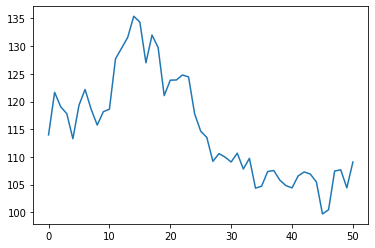

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(stock_market_progress)